In [2]:
# downloading data from yahoo no API but module is used
import yfinance as yf

# microsoft stock history
msft = yf.Ticker("MSFT")
msft_dframe = msft.history(period='max')

In [3]:
msft_dframe.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0


In [4]:
msft_dframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9292 entries, 1986-03-13 00:00:00-05:00 to 2023-01-24 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          9292 non-null   float64
 1   High          9292 non-null   float64
 2   Low           9292 non-null   float64
 3   Close         9292 non-null   float64
 4   Volume        9292 non-null   int64  
 5   Dividends     9292 non-null   float64
 6   Stock Splits  9292 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 580.8 KB


<AxesSubplot: xlabel='Date'>

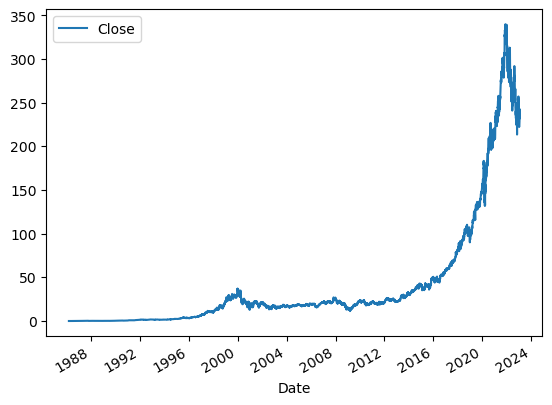

In [7]:
msft_dframe.plot.line(y='Close', use_index=True)

In [8]:
# creating target variable by comparing closing price of previous day with todays and inserts 1 if higher or 0 when lower
msft_dframe['Target'] = msft_dframe.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Close']

In [9]:
msft_dframe.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
2023-01-18 00:00:00-05:00,241.570007,242.380005,235.520004,235.809998,30028700,0.0,0.0,0.0
2023-01-19 00:00:00-05:00,233.779999,235.520004,230.679993,231.929993,28623000,0.0,0.0,0.0
2023-01-20 00:00:00-05:00,234.860001,240.740005,234.509995,240.220001,35323400,0.0,0.0,1.0
2023-01-23 00:00:00-05:00,241.100006,245.169998,239.649994,242.580002,31934000,0.0,0.0,1.0
2023-01-24 00:00:00-05:00,242.500000,243.949997,240.440002,242.039993,38169500,0.0,0.0,0.0


In [16]:
msft_data = (msft_dframe[['Close', 'Target']]).rename(columns={'Close':'Actual_close'}, inplace=False)

In [17]:
msft_data.head()

,Actual_close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060809,NaN
1986-03-14 00:00:00-05:00,0.062980,1.0
1986-03-17 00:00:00-05:00,0.064067,1.0
1986-03-18 00:00:00-05:00,0.062437,0.0
1986-03-19 00:00:00-05:00,0.061351,0.0


In [18]:
predictors = ['Close','High','Low','Open','Volume']
msft_dframe_copy = (msft_dframe.copy(deep=True)).shift(1)
msft_data = (msft_data.join(msft_dframe_copy[predictors])).iloc[1:]

In [19]:
msft_data.head()

,Actual_close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062980,1.0,0.060809,0.063524,0.055380,0.055380,1.031789e+09
1986-03-17 00:00:00-05:00,0.064067,1.0,0.062980,0.064067,0.060809,0.060809,3.081600e+08
1986-03-18 00:00:00-05:00,0.062437,0.0,0.064067,0.064609,0.062980,0.062980,1.331712e+08
1986-03-19 00:00:00-05:00,0.061351,0.0,0.062437,0.064609,0.061894,0.064067,6.776640e+07
1986-03-20 00:00:00-05:00,0.059723,0.0,0.061351,0.062980,0.060809,0.062437,4.789440e+07


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
stock_model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

In [23]:
train = msft_data.iloc[:-100]
test = msft_data.iloc[-100:]

In [24]:
train.head()

,Actual_close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062980,1.0,0.060809,0.063524,0.055380,0.055380,1.031789e+09
1986-03-17 00:00:00-05:00,0.064067,1.0,0.062980,0.064067,0.060809,0.060809,3.081600e+08
1986-03-18 00:00:00-05:00,0.062437,0.0,0.064067,0.064609,0.062980,0.062980,1.331712e+08
1986-03-19 00:00:00-05:00,0.061351,0.0,0.062437,0.064609,0.061894,0.064067,6.776640e+07
1986-03-20 00:00:00-05:00,0.059723,0.0,0.061351,0.062980,0.060809,0.062437,4.789440e+07


In [25]:
stock_model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [26]:
from sklearn.metrics import precision_score

In [27]:
predictions = stock_model.predict(test[predictors])

In [28]:
predictions

array([0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.])

In [29]:
import pandas as pd
predictions = pd.Series(predictions, index=test.index)

In [30]:
predictions

Date
2022-08-31 00:00:00-04:00    0.0
2022-09-01 00:00:00-04:00    0.0
2022-09-02 00:00:00-04:00    1.0
2022-09-06 00:00:00-04:00    0.0
2022-09-07 00:00:00-04:00    1.0
                            ... 
2023-01-18 00:00:00-05:00    1.0
2023-01-19 00:00:00-05:00    1.0
2023-01-20 00:00:00-05:00    0.0
2023-01-23 00:00:00-05:00    1.0
2023-01-24 00:00:00-05:00    1.0
Length: 100, dtype: float64

In [31]:
precision_score(test['Target'], predictions)

0.525

In [32]:
combined = pd.concat({"Target":test['Target'], "Predictions":predictions}, axis=1)
combined

,Target,Predictions
Date,,
2022-08-31 00:00:00-04:00,0.0,0.0
2022-09-01 00:00:00-04:00,0.0,0.0
2022-09-02 00:00:00-04:00,0.0,1.0
2022-09-06 00:00:00-04:00,0.0,0.0
2022-09-07 00:00:00-04:00,1.0,1.0
...,...,...
2023-01-18 00:00:00-05:00,0.0,1.0
2023-01-19 00:00:00-05:00,0.0,1.0
2023-01-20 00:00:00-05:00,1.0,0.0


<AxesSubplot: xlabel='Date'>

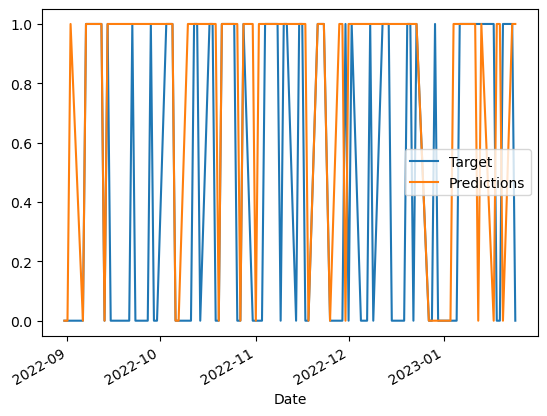

In [34]:
combined.plot()

In [40]:
# backtesting
start = 1000
step = 550



def backtest(msft_data, stock_model, predictors, start=1000, step=400):
    stock_preds = []
    for i in range(start, msft_data.shape[0], step):
        train = (msft_data.iloc[0:i]).copy(deep=True)
        test = (msft_data.iloc[i:(i+step)]).copy(deep=True)
        stock_model.fit(train[predictors], train['Target'])
        st_predictions = stock_model.predict_proba(test[predictors])[:,1]
        st_predictions = pd.Series(st_predictions, index=test.index)
        st_predictions[st_predictions > 0.6] = 1
        st_predictions[st_predictions <= 0.6] = 0
        st_combined = pd.concat({"Target":test['Target'], "Predictions":st_predictions}, axis=1)
        stock_preds.append(st_combined)


    stock_preds = pd.concat(stock_preds)
    return stock_preds


In [44]:
func_obj = backtest(msft_data, stock_model, predictors)

In [46]:
func_obj

,Target,Predictions
Date,,
1990-02-27 00:00:00-05:00,0.0,1.0
1990-02-28 00:00:00-05:00,1.0,1.0
1990-03-01 00:00:00-05:00,1.0,0.0
1990-03-02 00:00:00-05:00,1.0,1.0
1990-03-05 00:00:00-05:00,1.0,1.0
...,...,...
2023-01-18 00:00:00-05:00,0.0,0.0
2023-01-19 00:00:00-05:00,0.0,0.0
2023-01-20 00:00:00-05:00,1.0,0.0


In [47]:
func_obj['Predictions'].value_counts()

0.0    7786
1.0     505
Name: Predictions, dtype: int64

In [48]:
precision_score(func_obj['Target'], func_obj['Predictions'])

0.5247524752475248

In [49]:
weekly_mean = msft_data.rolling(7).mean()
quaterly_mean = msft_data.rolling(90).mean()
yearly_mean = msft_data.rolling(365).mean()

weekly_trend = msft_data.shift(1).rolling(7).mean()['Target']

In [50]:
msft_data.head()

,Actual_close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062980,1.0,0.060809,0.063524,0.055380,0.055380,1.031789e+09
1986-03-17 00:00:00-05:00,0.064067,1.0,0.062980,0.064067,0.060809,0.060809,3.081600e+08
1986-03-18 00:00:00-05:00,0.062437,0.0,0.064067,0.064609,0.062980,0.062980,1.331712e+08
1986-03-19 00:00:00-05:00,0.061351,0.0,0.062437,0.064609,0.061894,0.064067,6.776640e+07
1986-03-20 00:00:00-05:00,0.059723,0.0,0.061351,0.062980,0.060809,0.062437,4.789440e+07


In [51]:
msft_data['weekly_mean'] = weekly_mean['Close'] / msft_data['Close']
msft_data['quaterly_mean'] = quaterly_mean['Close'] / msft_data['Close']
msft_data['yearly_mean'] = yearly_mean['Close'] / msft_data['Close']

msft_data['yearly_weekly_mean'] = msft_data['yearly_mean'] / msft_data['weekly_mean']
msft_data['yearly_quaterly_mean'] = msft_data['yearly_mean'] / msft_data['quaterly_mean']
msft_data['weekly_trend'] = weekly_trend

msft_data['open_close_ratio'] = msft_data['Open'] / msft_data['Close']
msft_data['high_close_ratio'] = msft_data['High'] / msft_data['Close']
msft_data['low_close_ratio'] = msft_data['Low'] / msft_data['Close']

special_predictors = ['weekly_mean', 'quaterly_mean', 'yearly_mean', 'yearly_weekly_mean', 'yearly_quaterly_mean','weekly_trend',
'open_close_ratio','high_close_ratio','low_close_ratio']

In [52]:
new_predictions = backtest(msft_data.iloc[365:], stock_model, special_predictors)

In [53]:
precision_score(new_predictions['Target'], new_predictions['Predictions'])

0.5806451612903226

In [54]:
new_predictions['Predictions'].value_counts()

0.0    7647
1.0     279
Name: Predictions, dtype: int64